In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [1]:
import opendatasets


opendatasets.download('https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023


100%|██████████| 9.50k/9.50k [00:00<00:00, 2.32MB/s]

C:\Users\samir\AppData\Local\Temp\ipykernel_19120\2262092310.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Avg_Goals_Per_Match"] = df_filtered["Goals_Scored"] / df_filtered["Matches"]


                   Team  Matches  Goals_Scored  Avg_Goals_Per_Match
0           Real Madrid      486        1076.0             2.213992
16      Manchester City      127         269.0             2.118110
1         Bayern Munich      388         817.0             2.105670
2          FC Barcelona      341         675.0             1.979472
26        Crvena Zvezda      104         204.0             1.961538
15  Paris Saint-Germain      151         294.0             1.947020
6          Liverpool FC      230         435.0             1.891304
3     Manchester United      289         524.0             1.813149
9            Chelsea FC      197         337.0             1.710660
13    Borussia Dortmund      176         297.0             1.687500
35            Feyenoord       85         141.0             1.658824
8            SL Benfica      266         438.0             1.646617
12           Arsenal FC      197         324.0             1.644670
5              AC Milan      265         431.0  

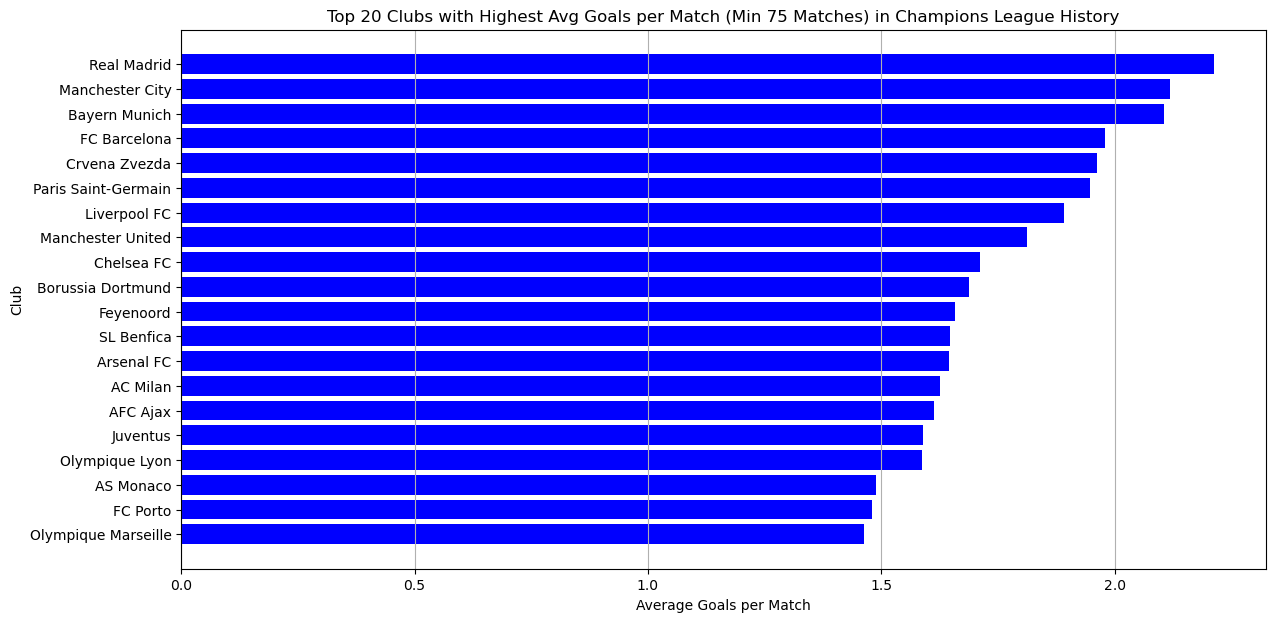

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Ensure this file is in the same directory or provide full path)
file_path = "UCL_AllTime_Performance_Table.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity (Modify if necessary)
df.columns = ["Rank", "Team", "Matches", "Wins", "Draws", "Losses", "Goals", "Goal_Difference", "Points"]

# Extract and clean the 'Goals' column (Format was '1076:55:00', extracting only the first number)
df["Goals_Scored"] = df["Goals"].str.extract(r'(\d+)').astype(float)

# Convert 'Matches' column to numeric
df["Matches"] = pd.to_numeric(df["Matches"], errors='coerce')

# Filter for teams with at least 75 matches played
df_filtered = df[df["Matches"] >= 75]

# Compute the average goals per match
df_filtered["Avg_Goals_Per_Match"] = df_filtered["Goals_Scored"] / df_filtered["Matches"]

# Sort by highest average goals per match and select top 20
top_avg_goals_filtered = df_filtered.sort_values(by="Avg_Goals_Per_Match", ascending=False).head(20)

# Display the top 20 clubs
print(top_avg_goals_filtered[["Team", "Matches", "Goals_Scored", "Avg_Goals_Per_Match"]])

# Plot the top 20 clubs
plt.figure(figsize=(14, 7))
plt.barh(top_avg_goals_filtered["Team"], top_avg_goals_filtered["Avg_Goals_Per_Match"], color='blue')
plt.xlabel("Average Goals per Match")
plt.ylabel("Club")
plt.title("Top 20 Clubs with Highest Avg Goals per Match (Min 75 Matches) in Champions League History")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x")

# Show the plot
plt.show()


                   Team  Matches  Goals_Scored  Avg_Goals_Per_Match
0           Real Madrid      486        1076.0             2.213992
1         Bayern Munich      388         817.0             2.105670
2          FC Barcelona      341         675.0             1.979472
3     Manchester United      289         524.0             1.813149
4              Juventus      297         472.0             1.589226
5              AC Milan      265         431.0             1.626415
6          Liverpool FC      230         435.0             1.891304
7              FC Porto      265         392.0             1.479245
8            SL Benfica      266         438.0             1.646617
9            Chelsea FC      197         337.0             1.710660
10             AFC Ajax      215         347.0             1.613953
11          Inter Milan      203         286.0             1.408867
12           Arsenal FC      197         324.0             1.644670
13    Borussia Dortmund      176         297.0  

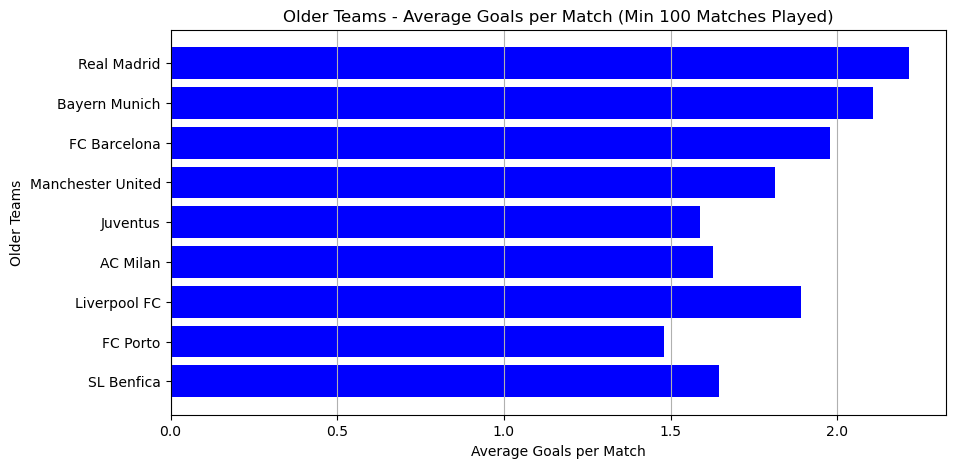

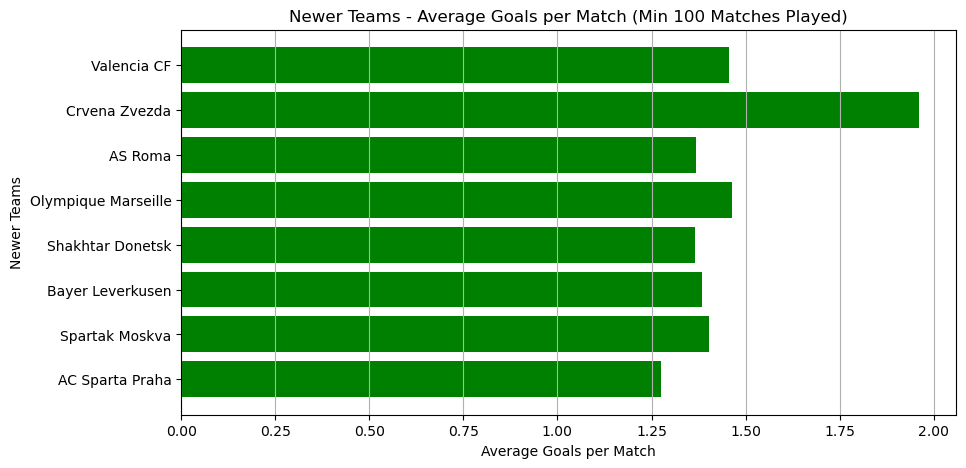

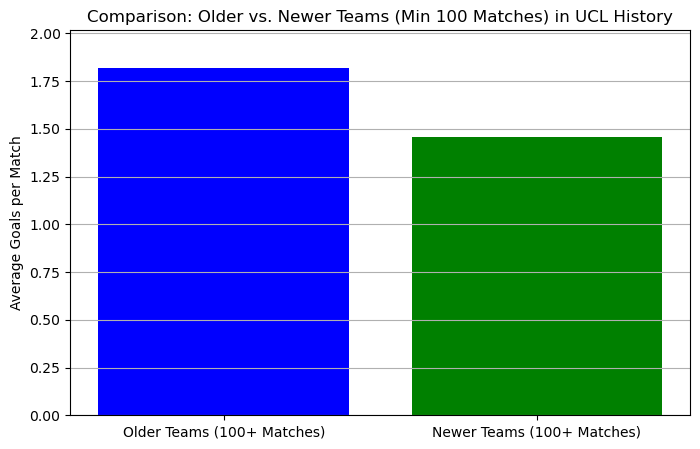

In [19]:
import pandas as pd

# Load the dataset
file_path = "UCL_AllTime_Performance_Table.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity
df.columns = ["Rank", "Team", "Matches", "Wins", "Draws", "Losses", "Goals", "Goal_Difference", "Points"]

# Extract and clean the 'Goals' column
df["Goals_Scored"] = df["Goals"].str.extract(r'(\d+)').astype(float)

# Convert 'Matches' column to numeric
df["Matches"] = pd.to_numeric(df["Matches"], errors='coerce')

# Compute average goals per match
df["Avg_Goals_Per_Match"] = df["Goals_Scored"] / df["Matches"]

# Filter dataset to include only teams with at least 100 matches played
df_100_matches = df[df["Matches"] >= 100]

# Display the filtered data
print(df_100_matches[["Team", "Matches", "Goals_Scored", "Avg_Goals_Per_Match"]])
import numpy as np

# Define percentiles to classify teams into "Older" and "Newer"
old_teams_100 = df_100_matches[df_100_matches["Matches"] > np.percentile(df_100_matches["Matches"], 75)]
new_teams_100 = df_100_matches[df_100_matches["Matches"] < np.percentile(df_100_matches["Matches"], 25)]

# Display older and newer teams
print("Older Teams (100+ Matches):")
print(old_teams_100[["Team", "Matches", "Avg_Goals_Per_Match"]])

print("\nNewer Teams (100+ Matches):")
print(new_teams_100[["Team", "Matches", "Avg_Goals_Per_Match"]])
import matplotlib.pyplot as plt

# Plot older teams' goal averages
plt.figure(figsize=(10, 5))
plt.barh(old_teams_100["Team"], old_teams_100["Avg_Goals_Per_Match"], color="blue")
plt.xlabel("Average Goals per Match")
plt.ylabel("Older Teams")
plt.title("Older Teams - Average Goals per Match (Min 100 Matches Played)")
plt.gca().invert_yaxis()
plt.grid(axis="x")

# Show the plot
plt.show()
# Plot newer teams' goal averages
plt.figure(figsize=(10, 5))
plt.barh(new_teams_100["Team"], new_teams_100["Avg_Goals_Per_Match"], color="green")
plt.xlabel("Average Goals per Match")
plt.ylabel("Newer Teams")
plt.title("Newer Teams - Average Goals per Match (Min 100 Matches Played)")
plt.gca().invert_yaxis()
plt.grid(axis="x")

# Show the plot
plt.show()
# Compute average goals per match for both groups
old_teams_avg_100 = old_teams_100["Avg_Goals_Per_Match"].mean()
new_teams_avg_100 = new_teams_100["Avg_Goals_Per_Match"].mean()

# Compare older vs newer teams in a summary bar chart
labels = ["Older Teams (100+ Matches)", "Newer Teams (100+ Matches)"]
values = [old_teams_avg_100, new_teams_avg_100]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=["blue", "green"])
plt.ylabel("Average Goals per Match")
plt.title("Comparison: Older vs. Newer Teams (Min 100 Matches) in UCL History")
plt.ylim(0, max(values) + 0.2)
plt.grid(axis="y")

# Show the plot
plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_19120\2262092310.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Avg_Goals_Per_Match"] = df_filtered["Goals_Scored"] / df_filtered["Matches"]


                   Team  Matches  Goals_Scored  Avg_Goals_Per_Match
0           Real Madrid      486        1076.0             2.213992
16      Manchester City      127         269.0             2.118110
1         Bayern Munich      388         817.0             2.105670
2          FC Barcelona      341         675.0             1.979472
26        Crvena Zvezda      104         204.0             1.961538
15  Paris Saint-Germain      151         294.0             1.947020
6          Liverpool FC      230         435.0             1.891304
3     Manchester United      289         524.0             1.813149
9            Chelsea FC      197         337.0             1.710660
13    Borussia Dortmund      176         297.0             1.687500
35            Feyenoord       85         141.0             1.658824
8            SL Benfica      266         438.0             1.646617
12           Arsenal FC      197         324.0             1.644670
5              AC Milan      265         431.0  

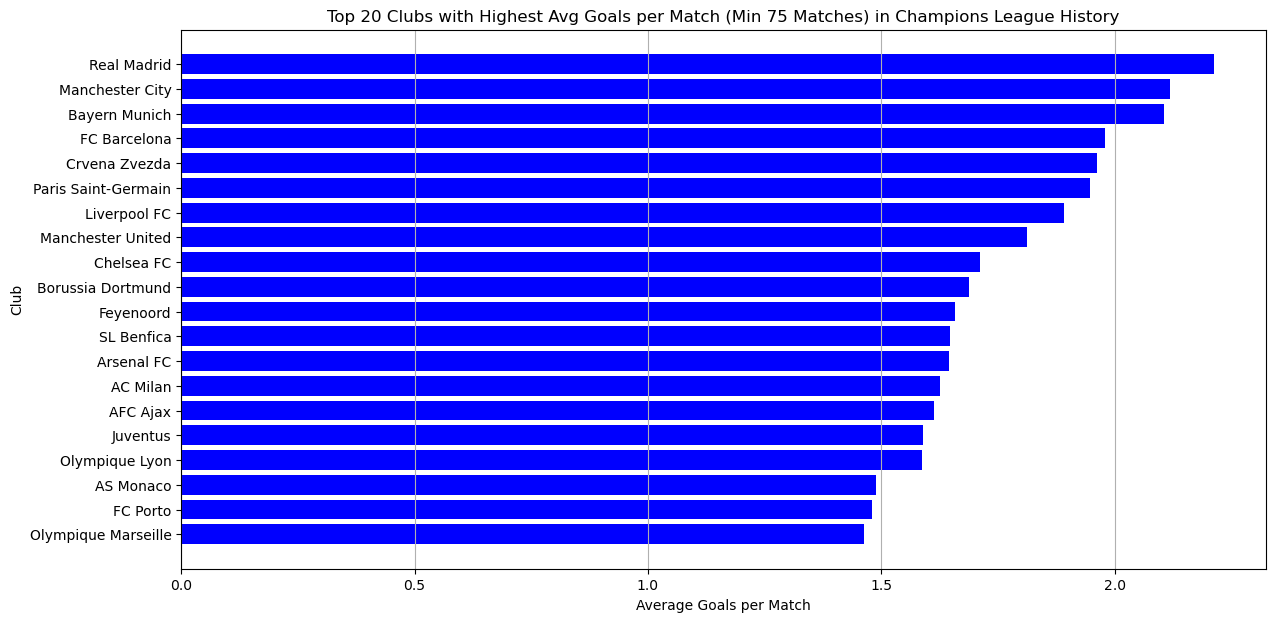

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Ensure this file is in the same directory or provide full path)
file_path = "UCL_AllTime_Performance_Table.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity (Modify if necessary)
df.columns = ["Rank", "Team", "Matches", "Wins", "Draws", "Losses", "Goals", "Goal_Difference", "Points"]

# Extract and clean the 'Goals' column (Format was '1076:55:00', extracting only the first number)
df["Goals_Scored"] = df["Goals"].str.extract(r'(\d+)').astype(float)

# Convert 'Matches' column to numeric
df["Matches"] = pd.to_numeric(df["Matches"], errors='coerce')

# Filter for teams with at least 75 matches played
df_filtered = df[df["Matches"] >= 75]

# Compute the average goals per match
df_filtered["Avg_Goals_Per_Match"] = df_filtered["Goals_Scored"] / df_filtered["Matches"]

# Sort by highest average goals per match and select top 20
top_avg_goals_filtered = df_filtered.sort_values(by="Avg_Goals_Per_Match", ascending=False).head(20)

# Display the top 20 clubs
print(top_avg_goals_filtered[["Team", "Matches", "Goals_Scored", "Avg_Goals_Per_Match"]])

# Plot the top 20 clubs
plt.figure(figsize=(14, 7))
plt.barh(top_avg_goals_filtered["Team"], top_avg_goals_filtered["Avg_Goals_Per_Match"], color='blue')
plt.xlabel("Average Goals per Match")
plt.ylabel("Club")
plt.title("Top 20 Clubs with Highest Avg Goals per Match (Min 75 Matches) in Champions League History")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x")

# Show the plot
plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_19120\1930238081.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100_matches["Time_Period"] = df_100_matches["Team"].apply(assign_time_period)



🔍 Goals Per Match Trends by Time Period:
    Time_Period  Avg_Goals_Per_Match
0     1955-1980             1.838736
1     1981-2000             1.583872
2  2011-Present             2.032565


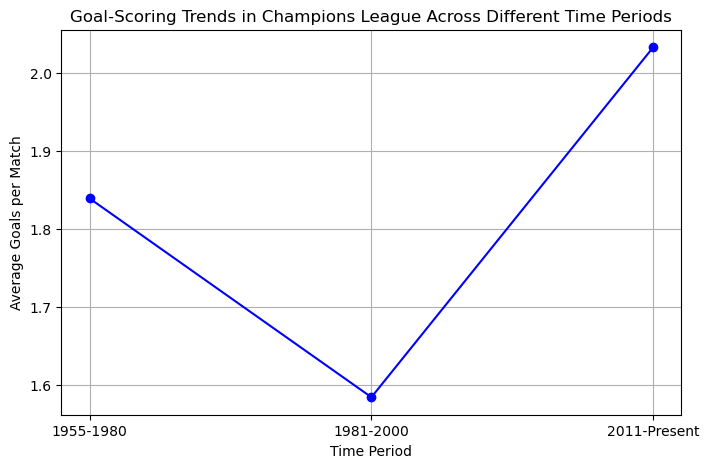

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "UCL_AllTime_Performance_Table.csv"  # Update this if the file is in a different path
df = pd.read_csv(file_path)

# Rename columns for clarity
df.columns = ["Rank", "Team", "Matches", "Wins", "Draws", "Losses", "Goals", "Goal_Difference", "Points"]

# Extract and clean the 'Goals' column
df["Goals_Scored"] = df["Goals"].str.extract(r'(\d+)').astype(float)

# Convert 'Matches' column to numeric
df["Matches"] = pd.to_numeric(df["Matches"], errors='coerce')

# Compute average goals per match
df["Avg_Goals_Per_Match"] = df["Goals_Scored"] / df["Matches"]

# Filter dataset to include only teams with at least 100 matches played
df_100_matches = df[df["Matches"] >= 100]

# Define estimated time periods (based on historical participation in UCL)
# Categorizing clubs into different footballing eras
time_periods = {
    "1955-1980": ["Real Madrid", "Benfica", "Ajax", "Bayern Munich", "Liverpool", "Inter Milan", "AC Milan"],
    "1981-2000": ["Juventus", "Barcelona", "Manchester United", "Borussia Dortmund", "Marseille", "PSV Eindhoven"],
    "2001-2010": ["Chelsea", "Arsenal", "AC Milan", "Inter Milan", "Porto", "Bayern Munich"],
    "2011-Present": ["Manchester City", "Paris Saint-Germain", "Liverpool", "Atletico Madrid", "RB Leipzig"]
}

# Create a new column for time period
def assign_time_period(team):
    for period, teams in time_periods.items():
        if team in teams:
            return period
    return "Unknown"

df_100_matches["Time_Period"] = df_100_matches["Team"].apply(assign_time_period)

# Filter out unknown teams (not assigned a time period)
df_time_filtered = df_100_matches[df_100_matches["Time_Period"] != "Unknown"]

# Group by time period and compute average goals per match
time_period_avg_goals = df_time_filtered.groupby("Time_Period")["Avg_Goals_Per_Match"].mean().reset_index()

# Display time period trends
print("\n🔍 Goals Per Match Trends by Time Period:")
print(time_period_avg_goals)

# Plot goal trends across different time periods
plt.figure(figsize=(8, 5))
plt.plot(time_period_avg_goals["Time_Period"], time_period_avg_goals["Avg_Goals_Per_Match"], marker="o", linestyle="-", color="blue")
plt.xlabel("Time Period")
plt.ylabel("Average Goals per Match")
plt.title("Goal-Scoring Trends in Champions League Across Different Time Periods")
plt.grid()

# Show the plot
plt.show()
